<a href="https://colab.research.google.com/github/othoni-hub/M1-Maths-Algo/blob/main/M_1e_Tale_Aleatoire3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mathématiques 
# 1<sup>ère</sup> - Terminale (spécialité, options complémentaire et experte)


## Chapitre 3 : PROBABILITÉS et STATISTIQUES
## 3<sup>ème</sup> partie : - Statistiques -

**O.THÖNI - IFUCOME -**
*Document sous licence Creative Commons (CC) : By - NC - SA*


**_3.1. Fréquence d'apparition des lettres dans un texte (+ décodage d'un code César, pour rire...)_**

**<span style="color: #D17460">1Spé... et plus... </span>**

**<span style="color: #26B260">Python : chaînes de caractères</span>**

In [ ]:
import matplotlib.pyplot as plt

alphabet = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
frequences_theoriques = [0.084, 0.0106, 0.0303, 0.0418, 0.1726, 0.0112, 0.0127, 0.0092, 0.0734, 0.0031, 0.0005, 0.0601, 0.0296, 0.0713, 0.0526, 0.0301, 0.0099, 0.0655, 0.0808, 0.0707, 0.0574, 0.0132, 0.0004, 0.0045, 0.003, 0.0012]

def diagramme_barres(frequences_observees):
    plt.bar(alphabet,frequences_observees,color = 'red', width = 0.2, alpha = 0.6, label = 'frequences observees')
    plt.bar(alphabet,frequences_theoriques,color = 'blue', width = 0.5, alpha = 0.1, label = 'frequences francais')
    plt.title("Fréquence d'apparition de chaque lettre dans le texte")
    plt.legend()
    

def calcule_frequences(texte) :    
    nb_occurrences = [0]*26
    N = len(texte)
    for lettre in texte:
        if lettre != ' ':
            k = alphabet.index(lettre) # exemple : alphabet.index("D") = 3 : numéro de l'occurrence dans la liste
            nb_occurrences[k] = nb_occurrences[k] + 1
    # print(nb_occurrences)
    frequences_observees = [nb_occurrences[k] / N for k in range(26)]
   
    return frequences_observees

    
def analyse_frequences(texte):    
    frequences_observees = calcule_frequences(texte)
    cle_probable = frequences_observees.index(max(frequences_observees))
    print('La clé de chiffrement la plus probable, au regard de la valeur modale correspondant au "E", est :',cle_probable - 4)
    
    return cle_probable - 4


def cesar(sens, cle, message):

    if sens == 'C' :
        # permet de traiter a l'identique codage et decodage
        # on effectue simplement le decalage dans un sens ou dans l'autre
        codec=+1
    else :
        codec=-1

    #decalage=int(input('Entrez la clé de codage : décalage (entre -25 et +25) : '))
    # exemple : "Avocat" (A vaut K) corespond à un décalage de +10
    
    resultat =''


    for k in range(len(message)) :
        if message[k] == ' ' : # le caractere est une espace
            resultat = resultat + ' '
        else :
            code_lettre=ord(message[k]) + codec*cle # ord renvoie le code ASCII du caractère
            if code_lettre > 90 : # on a depasse vers la droite le code du Z
                code_lettre=code_lettre-26 # on repart du A vers la droite

            if code_lettre < 65 : # on a dépasse vers la gauche le code du A
                code_lettre=code_lettre+26 # on repart du Z vers la gauche

            resultat = resultat + chr(code_lettre) # on concatene la lettre obtenue
            
    return resultat


La clé de chiffrement la plus probable, au regard de la valeur modale correspondant au "E", est : 9


'INSTRUIT DE CES EVENEMENTS ET REDOUTANT LA FAIBLESSE DES GAULOIS QU IL CONNAISSAIT SI MOBILES DANS LEURS RESOLUTIONS ET AVIDES DE NOUVEAUTES CESAR NE CRUT PAS DEVOIR SE FIER A EUX'

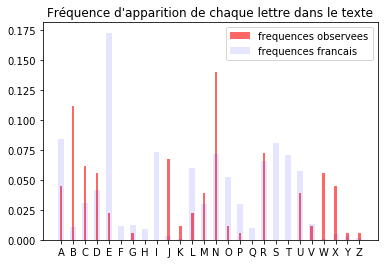

In [ ]:
sens = 'D'
message = "RWBCADRC MN LNB NENWNVNWCB NC ANMXDCJWC UJ OJRKUNBBN MNB PJDUXRB ZD RU LXWWJRBBJRC BR VXKRUNB MJWB UNDAB ANBXUDCRXWB NC JERMNB MN WXDENJDCNB LNBJA WN LADC YJB MNEXRA BN ORNA J NDG"
frequences_observees = calcule_frequences(message)
diagramme_barres(frequences_observees)
cle = analyse_frequences(message)
cesar(sens,cle,message)

**_Allons plus loin..._**

Dans la recherche de la clé précédente, on a cherché la clé la plus probable au regard de la valeur modale (celle de plus haute fréquence) de la série des lettres codées, mise en coïncidence avec celle de la distribution globale des lettres dans la langue française.

On aura une bien meilleure assurance si l'on étudie l'écart de la totalité de la distribution de l'alphabet observé par rapport à la répartition globale :

pour une position de la clé donnée, on calcule la distance euclidienne : la racine de la somme des carrés des écarts relatifs entre la fréquence observée et la fréquence théorique (probabilité), la valeur de la clé donnant la plus plus petite distance sera la clé la plus probable.

In [ ]:
from math import sqrt

def calcule_distance(frequences_observees):
    distance = sqrt(sum((frequences_observees[k] - frequences_theoriques[k] )**2/ frequences_theoriques[k] for k in range(26)))
    
    return(distance)
    

In [ ]:
calcule_distance(frequences_observees)

3.3431837917603575

In [ ]:
def distance_min(frequences_observees):
    dist_min = 1000
    frequences_alphabet_teste = [0] *26
    
    for cle_testee in range(26) :
        for k in range(26) :
            frequences_alphabet_teste[k] = frequences_observees[(k + cle_testee)%26]
    
        distance = calcule_distance(frequences_alphabet_teste)
        print('Clé :',cle_testee, ', distance : ',distance)
    
        if distance < dist_min :
            dist_min = distance
            cle_plus_probable = cle_testee
    return(dist_min, cle_plus_probable)

In [ ]:
clef = distance_min(frequences_observees)
print('La distance minimale par rapport à la distribution globale des lettres dans la langue française est réalisée pour la clé :',clef[1])

Clé : 0 , distance :  3.3431837917603575
Clé : 1 , distance :  3.0352955665958397
Clé : 2 , distance :  3.909701778399293
Clé : 3 , distance :  6.880395628790666
Clé : 4 , distance :  4.277643235168721
Clé : 5 , distance :  5.824172304792348
Clé : 6 , distance :  3.6728296850209508
Clé : 7 , distance :  4.530562732008754
Clé : 8 , distance :  2.2770993216622166
Clé : 9 , distance :  0.3238413652493697
Clé : 10 , distance :  2.8263672415348835
Clé : 11 , distance :  2.10855428585729
Clé : 12 , distance :  3.2174484718381993
Clé : 13 , distance :  4.266143369238417
Clé : 14 , distance :  4.283304044467817
Clé : 15 , distance :  2.9935149227142617
Clé : 16 , distance :  3.611315221404613
Clé : 17 , distance :  8.63997374867833
Clé : 18 , distance :  4.1908489251837455
Clé : 19 , distance :  3.1780605648147544
Clé : 20 , distance :  2.175291186170072
Clé : 21 , distance :  4.0424428672048105
Clé : 22 , distance :  1.7157914210540723
Clé : 23 , distance :  2.32179302625577
Clé : 24 , distan

Nous venons de faire un test d'adéquation en utilisant le **maximum de vraisemblance**, obtenu par la mesure de la distance minimale entre la distribution observée et la distribution théorique.

Nous sommes très proches des tests d'adéquation savants : en travaillant avec les effectifs au lieu des fréquences, on obtient une variable aléatoire D² = n.d² dont la loi est appelée loi du $\chi ^2$, dont le "degré de liberté est ici 25 (comme on a 26 lettres dans l'alphabet, une fois que les 25 premières valeurs de la distribution sont données, la dernière est fixée).

On trouvera des explications plutôt accessibles ici : http://vivienfrederic.free.fr/terminaleS/detecter_piece_truquee.pdf (qui donne d'ailleurs le TP de **<span style="color: #D17460">TCompl </span>** sur le test de conformité d'une pièce (son exercice est très intelligent : la probabilité que la pièce donne "pile" est de 0.44 une fois sur 4, 0.56 une fois sur 4, 0.5 le reste du temps ! Un test local ne permet pas de détecter la pièce truquée (l'espérance est la même qu'une pièce normale, l'écart-type très proche, il faut tester tout l'échantillonnage...)

Calculons le $\chi ^2$ de la distribution de notre alphabet le plus probable.




In [ ]:

len(message)*clef[0]

57.96760437963717

En lisant dans une table de $\chi ^2$, à la ligne 180 (longueur de notre message), comme ici : http://www.math.univ-metz.fr/~bonneau/STAT0607/table_khi2_complete.pdf , on constate que le niveau de confiance de notre clé est supérieur à 99,9%

Le statisticien n'affirme jamais qu'il accepte l'hypothèse que le décalage de décodage soit bien celui que l'on a trouvé.
Il dira qu' "au risque de 0,1% , il ne peut rejeter l'hypothèse que ce décalage soit le bon !" (c'est-à-dire que, en acceptant de se tromper seulement à 0,1%, il ne peut rejeter l'hypothèse que les écarts entre la distribution de notre alphabet recalé et la distribution des lettres de la langue française n'a pas d'autre explication que les fluctuations d'échantillonnage...

L'homme normal conclura que c'est bon...

_**remarque :** le test binaire pour le diagnostic médical proposé en **<span style="color: #D17460">TCompl </span>** procède de la même méthode, avec un degré de liberté de 1._

On trouvera un bon résumé sur les tests ici : https://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-l-inf-tests.pdf, et pour approfondir la question, on pourra aller voir par là : https://www.math.u-bordeaux.fr/~mchabano/Agreg/ProbaAgreg1213-COURS3-Stat2.pdf ...

**_3.2 sur-réservation_**

**<span style="color: #D17460">TSpé - TCompl </span>**

L'avion contient 100 places.
Nombre de places achetées : 107
Sur 1000 simulations, dans 9.0 % des vols,certaines personnes n’ont pu embarquer


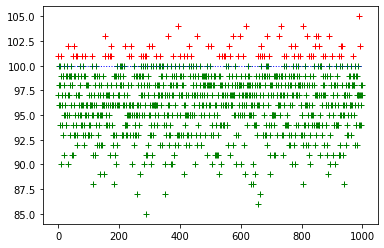

In [ ]:
from random import random
import matplotlib.pyplot as plt

nb_places_appareil = 100
print("L'avion contient",nb_places_appareil,'places.')
N = 1000 # nombre de simulations
p = 0.1 # probabilité qu'un client ayant acheté son billet ne se présente pas à l'embarquement

nb_places_achetees = 107

print('Nombre de places achetées :', nb_places_achetees)

surbook=0

for simul in range(N):
    P = [] # liste des présents : 1 présent, 0 : absent
    for k in range(nb_places_achetees):
        if random() > p :
            P.append(1)
        else :
            P.append(0)
            
    venus = nb_places_achetees - P.count(0)
        
    if venus > nb_places_appareil :
        surbook = surbook+1
        plt.plot(simul, venus, color = 'red', marker = '+')
    else :
        plt.plot(simul, venus, color = 'green', marker = '+')
        
plt.plot([0,N],[nb_places_appareil,nb_places_appareil], color = 'blue', linewidth = 1, linestyle = ':')
       
print('Sur',N,'simulations, dans',surbook/N*100,"% des vols,certaines personnes n’ont pu embarquer")
plt.show() 

Maintenant, on cherche k tel que P(X>k) < $\alpha$ où X suit une loi binomiale...

In [ ]:
def factorielle(n):
    f = 1
    for k in range(1,n+1):
        f = f * k
    return f

def combinaison(k,n):
    c = 1
    for m in range(n,n-k,-1):
        c = c * m
    c = int(c / factorielle(k))
    return c

def loi_binomiale(k,n,p): #P([X = k]) où X suit B(n,p)
    return combinaison(k,n)*p**k*(1-p)**(n-k)


In [ ]:
alpha = 0.05 # niveau de risque

nb_places_appareil = 100
p = 0.15 # probabilité qu'un client ayant acheté son billet ne se présente pas à l'embarquement

nb_places_achetees = nb_places_appareil

surbook_plus = True
# X : nombre de personnes présentes à l'embarquement, X suit B(nb_place_achetees, 1-p)
while  surbook_plus : 
    # tant que la probabilité de sur-réservation est inférieure au risque accepté, on augmente le nombre de places mises en vente
    nb_places_achetees = nb_places_achetees + 1
    P = 0
    for X in range(nb_places_appareil + 1 ,nb_places_achetees + 1):
        P = P + loi_binomiale(X,nb_places_achetees,1-p)
    # P est alors la probabilité totale que le nombre de présents dépasse le nombre de place de l'appareil
    if P > alpha:
        surbook_plus = False
        
print('Dans notre appareil de',nb_places_appareil,'places,')
print('avec',p*100,"% de clients non présents à l'embarquement,")
print("nous risquons de ne pouvoir honorer l'ensemble des réservations dans plus de",alpha*100,'% des cas')
print('si nous mettons en vente',nb_places_achetees,'billets ou plus.')
        
    

Dans notre appareil de 100 places,
avec 15.0 % de clients non présents à l'embarquement,
nous risquons de ne pouvoir honorer l'ensemble des réservations dans plus de 5.0 % des cas
si nous mettons en vente 112 billets ou plus.


**_3.3. Les bases en probabilités :_**

**_Univers, événements, variable aléatoire, loi de probabilité, fonction de répartition, caractéristiques de position et de dispersion... sur un exemple_**

**<span style="color: #D17460"> (2nde) - 1Spé - TSpé - TCompl </span>**

**<span style="color: #26B260">Python : ensembles ('_set_'), dictionnaires (ensemble d'objets de forme clé:valeur)</span>**

source : http://revue.sesamath.net/spip.php?article1226 , travail remarquable d'Alain BUSSER

Considérons un dé à 20 faces (icosaèdre), que l'on lance, nous allons mettre en place tous les éléments permettant d'étudier la variable aléatoire égale au nombre de diviseurs de la face obtenue.. 


In [ ]:
def nombre_diviseurs(n):
    return len([d for d in range(1,n+1) if n%d==0])

* **Univers :**

In [ ]:
U = set(range(1,21)) # Omega : ensemble des faces de dé à  20 faces
print(U)


{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}


In [ ]:
{1,2,3}=={2,3,1}

True

In [ ]:
1*3 in {1,2,3}

True

* **Événements :**

In [ ]:
A = set(range(2,21,2)) # événement 'la face est paire'
print(A)

B = set(k for k in U if nombre_diviseurs(k) == 2) # événement : 'la face est un nombre premier'
print(B)

{2, 4, 6, 8, 10, 12, 14, 16, 18, 20}
{2, 3, 5, 7, 11, 13, 17, 19}


* **Intersection et Union, Complémentaire :**

In [ ]:
A_ou_B = A.union(B)
print("Événement : 'La face est un nombre pair ou premier :'", A_ou_B)

A_inter_B = A.intersection(B)
print("Événement : 'La face est un nombre pair et premier :'", A_inter_B)

A_barre = U.difference(A)
print("Événement : 'La face est un nombre impair :'",A_barre )

Événement : 'La face est un nombre pair ou premier :' {2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20}
Événement : 'La face est un nombre pair et premier :' {2}
Événement : 'La face est un nombre impair :' {1, 3, 5, 7, 9, 11, 13, 15, 17, 19}


In [ ]:
C = {1,2}
D = {1,2}
C.difference(D)

set()

* **Probabilité d'un événement :**

In [ ]:
def P(E):
    return len(E)/len(U)

In [ ]:
P(A.union(B)) == P(A)+P(B) - P(A.intersection(B)) # attention : comparaison risquée de flottants...


True

In [ ]:
print('P(A.union(B)) = ',P(A.union(B)))
print('P(A)+P(B) - P(A.intersection(B)) = ',P(A)+P(B) - P(A.intersection(B)))

P(A.union(B)) =  0.85
P(A)+P(B) - P(A.intersection(B)) =  0.85


In [ ]:
print("La probabilité d'obtenir un nombre premier est :", P(B))

La probabilité d'obtenir un nombre premier est : 0.4


* **Probabilité conditionnelle :**

In [ ]:
def proba_sachant_que(B,A):
    assert len(B)>0
    return P(A.intersection(B))/P(B)

In [ ]:
print("On obtient une face qui est un nombre premier, la probabilité qu'elle soit paire est :", proba_sachant_que(B,A))

On obtient une face qui est un nombre premier, la probabilité qu'elle soit paire est : 0.125


* **Variable aléatoire :**

On appelle X la variable aléatoire égale au nombre de diviseurs de la face obtenue.

In [ ]:
X = { n : nombre_diviseurs(n) for n in U } 
# X(Oméga) : univers sous forme de dictionnaire : la clé est le numero de la face,  
# la valeur, son nombre de diviseurs
print(X)

{1: 1, 2: 2, 3: 2, 4: 3, 5: 2, 6: 4, 7: 2, 8: 4, 9: 3, 10: 4, 11: 2, 12: 6, 13: 2, 14: 4, 15: 4, 16: 5, 17: 2, 18: 6, 19: 2, 20: 6}


In [ ]:
X.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [ ]:
X.values()

dict_values([1, 2, 2, 3, 2, 4, 2, 4, 3, 4, 2, 6, 2, 4, 4, 5, 2, 6, 2, 6])

* **Loi de la variable aléatoire X :**

(c'est à dire X($\Omega$), puis pour chacun d'eux, on associe sa probabilité)

On définit d'abord les événements [X=k]

In [ ]:
def egal(X,k):
    return {x for x in X.keys() if X[x]==k}

def loi(X):
    return {k : P(egal(X,k)) for k in X.values()}



In [ ]:
loi_X = loi(X)
print(loi_X)

X_Omega = list(loi_X.keys())
#X_Omega[:] = sorted(X_Omega)
print('X(Omega) =', X_Omega)

probabilites = list(loi_X.values())
print('Probabilités respectives :',probabilites)

{1: 0.05, 2: 0.4, 3: 0.1, 4: 0.25, 6: 0.15, 5: 0.05}
X(Omega) = [1, 2, 3, 4, 6, 5]
Probabilités respectives : [0.05, 0.4, 0.1, 0.25, 0.15, 0.05]


* **Représentation graphique**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(X.values())

dict_values([1, 2, 2, 3, 2, 4, 2, 4, 3, 4, 2, 6, 2, 4, 4, 5, 2, 6, 2, 6])


Text(0, 0.5, 'probabilites')

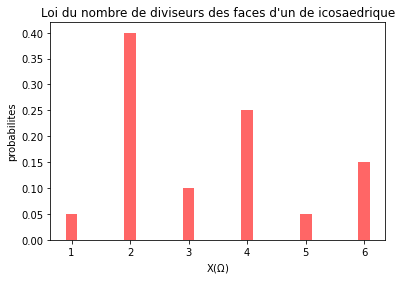

In [ ]:

plt.bar(X_Omega,probabilites, width = 0.2, color = 'red', alpha = 0.6)
plt.title("Loi du nombre de diviseurs des faces d'un de icosaedrique")
plt.xlabel('X($\Omega$)')
plt.ylabel('probabilites')

* **Fonction de répartition**

In [ ]:
def au_plus(X,k):
    return {x for x in X.keys() if X[x]<=k}

def fRep(X):
    return {k:P(au_plus(X,k)) for k in X.values()}

print(fRep(X))

{1: 0.05, 2: 0.45, 3: 0.55, 4: 0.8, 6: 1.0, 5: 0.85}


* **Éléments caractériques :**

  * **Espérance :**
  * **Variance :**
  * **Écart-type :**

In [ ]:
def E(X):
    return sum({k*P(egal(X,k)) for k in X.values()})

def V(X):
    X2 = { k:X[k]**2 for k in X.keys() }
    return E(X2)-E(X)**2 # formule de Koenig-Huygens

def sigma(X):
    from math import sqrt
    return sqrt(V(X))

In [ ]:
print('Espérance de X :',E(X))
print('Variance de X :', V(X))
print('Écart-type de X :',sigma(X))

Espérance de X : 3.3000000000000003
Variance de X : 2.309999999999997
Écart-type de X : 1.5198684153570654


  * **Quartiles**
  
  Note : On définira la médiane comme le 2<sup>ème</sup> quartile, valeur de la série à partir de laquelle l'effectif dépasse 50% de la population, ce qui n'est pas la définition enseignée en lycée en France
  
  * **Intervalle inter-quartiles**  
  
  * **Deciles**
  
  Reprenons la fonction de répartition obtenue ci-dessus et classons les valeurs.
  Les calculs se font par interpolation linéaire entre les points charnières (Théorème de Thalès)

In [ ]:
F = fRep(X)
FF = sorted(F.items(), key=lambda t: t[0])
print(FF)

[(1, 0.05), (2, 0.45), (3, 0.55), (4, 0.8), (5, 0.85), (6, 1.0)]


In [ ]:
k = 0
while FF[k][1] < 0.5 :
    k = k+1

mediane = FF[k-1][0]+(0.5 - FF[k-1][1])/(FF[k][1] - FF[k-1][1])*(FF[k][0]-FF[k-1][0])
print('Médiane de la série :',mediane)

Médiane de la série : 2.4999999999999996


In [ ]:
# Quartiles :
quartiles = [0]*3
for d in range(1,4):
    k = 0
    while FF[k][1] < d/4 :
        k = k+1

    quartiles[d-1] = FF[k-1][0]+(d/4 - FF[k-1][1])/(FF[k][1] - FF[k-1][1])*(FF[k][0]-FF[k-1][0])
    print('Q',d,'=',quartiles[d-1])


Q 1 = 1.5
Q 2 = 2.4999999999999996
Q 3 = 3.8


In [ ]:
# Intervalle inter-quartiles
print("50% de la série se situe dans l'intervalle [", quartiles[0],';',quartiles[2],'].')

50% de la série se situe dans l'intervalle [ 1.5 ; 3.8 ].


In [ ]:
# Déciles :
for d in range(1,10):
    k = 0
    while FF[k][1] < d/10 :
        k = k+1

    decile = FF[k-1][0]+(d/10 - FF[k-1][1])/(FF[k][1] - FF[k-1][1])*(FF[k][0]-FF[k-1][0])
    print('D',d,'=',decile)


D 1 = 1.125
D 2 = 1.375
D 3 = 1.625
D 4 = 1.875
D 5 = 2.4999999999999996
D 6 = 3.1999999999999997
D 7 = 3.5999999999999996
D 8 = 4.0
D 9 = 5.333333333333334


**_3.3. Simulation d'un échantillon de variable aléatoire d'espérance et d'écart-type connus_**

source : http://revue.sesamath.net/spip.php?article1226

Si on connaît uniquement la loi d’une variable aléatoire (et pas son mode de fabrication), on peut simuler la variable aléatoire à l’aide d'une inversion de sa fonction de répartition : on tire un nombre aléatoire u, et l'on cherche son pseudo-antécédent par F (la plus grande valeur k telle que F(k)soit inférieure ou égale à u).
Reprenons l'exemple précédent, dans le cas du nombre de diviseurs d’un dé icosaédrique, où l'on avait, rappelons-le :

In [ ]:
from random import random

F = {1: 0.05, 2: 0.45, 3: 0.55, 4: 0.8, 5: 0.85, 6: 1.0}

def simulation():
    r = random()
    if r<0.05:
        return 1
    elif r<0.45:
        return 2
    elif r<0.55:
        return 3
    elif r<0.8:
        return 4
    elif r<0.85:
        return 5
    else:
        return 6

Fabriquons un échantillon de taille N = 100 :

In [ ]:
N = 100

sim = [ simulation() for k in range(N) ]
print(sim)

[2, 2, 3, 3, 2, 1, 2, 6, 4, 6, 2, 2, 2, 2, 5, 5, 2, 2, 4, 6, 5, 4, 2, 2, 2, 3, 2, 4, 4, 4, 2, 2, 6, 6, 1, 2, 4, 2, 4, 2, 6, 6, 6, 4, 4, 2, 6, 4, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 6, 2, 4, 3, 6, 2, 3, 6, 3, 2, 4, 4, 2, 4, 4, 4, 2, 6, 3, 2, 2, 5, 4, 2, 5, 3, 3, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2]


Fabriquons M = 1000 échantillons de taille N :

In [ ]:
M = 1000

def simul_echant(M):
    return [ [ simulation() for k in range(N) ] for n in range(M) ]

sim_M_echantillons = simul_echant(M)
#print(sim_M_echantillons)

In [ ]:
def moyenne(liste):
    return sum(liste)/len(liste)
 
def variance(liste):
    liste_des_carrés = list(map(carré,liste))
    return moyenne(liste_des_carrés)-carré(moyenne(liste))
 
def écart_type(liste):
    return racine(variance(liste))

Calculons la liste des moyennes des M échantillons :

In [ ]:
def simul_moyennes(M):
    return [ moyenne(sim_M_echantillons[n][:]) for n in range(M) ]

In [ ]:
l = simul_moyennes(M)
# print(l)

* **_proportions d'échantillons pour lesquels |m - $\mu |< \frac{k \sigma}{ \sqrt{n}}$ (pour k=1, 2, 3)_**

Comme $\sqrt{100}$=10 et que l’écart-type du nombre de diviseurs d’un dé icosaédrique est environ 1,52, le nombre avec lequel comparer l’écart-type des moyennes est 0,152. Or on obtient quelque chose comme 0.15568434699730013 avec écart_type(simul_moyennes(1000)).

Comme l’espérance du nombre de diviseurs du dé icosaédrique est 3,3 on va faire calculer la fréquence des échantillons dont la moyenne est entre 3,3-k×0,152 et 3,3+k×0,152. Pour cela on construit par compréhension une liste des tests réalisés sur les M échantillons. C’est une liste de M booléens, dans laquelle Python va compter les occurences de True ce qui permet d’avoir les fréquences :

In [ ]:
def propfluct(k):
    liste = [ 3.3 - k*0.152 < moyenne([simulation() for k in range(N)]) <3.3 + k*0.152 for n in range(M) ] 
    return liste.count(True)/M

In [ ]:
[ propfluct(k) for k in range(1,4)]

[0.69, 0.956, 0.997]

Les résultats sont proches de ceux obtenus avec une loi normale, normal !

**_3.4. Statistiques à deux variables_**

**<span style="color: #D17460"> TCompl </span>**

Pour un petit décrassage de cours, voir ici : https://frama.link/OT_Python1T_coursStats2Var

En application, nous allons étudier la corrélation entre les surfaces d'appartements dans une agence parisienne et les prix des loyers.

Par exemple, au prix du marché, quel loyer peut-on espérer pour un appartement de 100 m² ?

Ou encore : Quelle surface puis-espérer si je suis en mesure de mettre un moyer mensuel de 1000 € ?

Dans le premier cas, il s'agit d'effectuer un ajustement du prix en fonction de la surface, dans le second un ajustement de la surface en fonction du prix.

Nombre d'appartements : 28
Surface moyenne : 82.32142857142857 m²
Loyer moyen : 2056.0714285714284 €


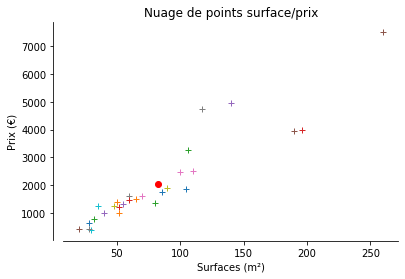

In [ ]:
import matplotlib.pyplot as plt


def point_moyen(x,y):
    G = [sum(x)/len(x),sum(y)/len(y)]
    return G


def graphique(x,y):
    L = len(x)
    for k in range(L):
        plt.plot(x[k], y[k], marker = '+')
        plt.xlabel('Surfaces (m²)')
        plt.ylabel('Prix (€)')
        plt.title('Nuage de points surface/prix')

        ax = plt.gca() # récupération du paramétrage des axes

        ax.spines['left'].set_position('zero') # positionnement de l'axe des ordonnées à x = 0
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('zero') # positionnement de l'axe des abscisses à y = 0
        ax.spines['top'].set_color('none')

# données (on pourrait travailler sur des données réelles en utilisant des modules complémentaires tel "csv")
surfaces = [28,50,106,196,55,190,110,60,48,35,86,65,32,52,40,260,70,117,90,30,105,52,80,60,140,20,100,28]
prix = [650,1400,3250,4000,1340,3950,2500,1600,1250,1250,1750,1500,775,1225,1000,7500,1625,4750,1890,390,1875,1000,1350,1475,4950,425,2475,425]
L = len(surfaces)
print("Nombre d'appartements :",L)


G = point_moyen(surfaces,prix)
X_bar = G[0]
Y_bar = G[1]
print('Surface moyenne :',X_bar,'m²')
print('Loyer moyen :',Y_bar,'€')
graphique(surfaces, prix)
plt.plot(X_bar,Y_bar,'r' , marker = 'o')


**_Droite de régression du prix en la surface, selon la méthode des moindres carrés_**

(justifiée par le relatif alignement des points du nuage)

In [ ]:
def covariance(x,y):
    L = len(x)
    x_bar = sum(x)/L
    y_bar = sum(y)/L
   
    cov_xy = 0
    for k in range(L):
        cov_xy = cov_xy +  (x[k] - x_bar)*(y[k]-y_bar)
    cov_xy = cov_xy / L
    return cov_xy

In [ ]:
covariance(surfaces,prix)

84302.86989795917

In [ ]:
a = covariance(surfaces,prix)/covariance(surfaces,surfaces)
b = Y_bar - a * X_bar
print("Équation de la droite d'ajustement du prix en fonction de la surface : y=",a,'.x +',b)


Équation de la droite d'ajustement du prix en fonction de la surface : y= 26.765817999508364 .x + -147.32894603095656


In [ ]:
def f(a,b,x) : 
    return a*x + b

def trace_droite(a,b, x_max):
    plt.plot([0,x_max],[b, f(a,b,x_max)], color = 'blue', linewidth = 0.5)
    ax = plt.gca() # récupération du paramétrage des axes

    ax.spines['left'].set_position('zero') # positionnement de l'axe des ordonnées à x = 0
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero') # positionnement de l'axe des abscisses à y = 0
    ax.spines['top'].set_color('none')


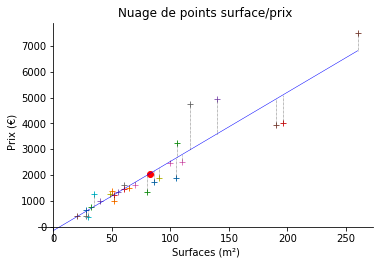

In [ ]:
graphique(surfaces, prix)
plt.plot(X_bar,Y_bar,'r' , marker = 'o')
trace_droite(a,b,max(surfaces))

for k in range(L):
    plt.plot([surfaces[k],surfaces[k]], [prix[k], f(a,b,surfaces[k])], color = 'black', linestyle = ':', linewidth = 0.5)

**_loyer envisageable pour une surface de 100 m² ?_**

In [ ]:
x_envisage = 100
y_ajuste = f(a,b,x_envisage)

print('Pour une surface de 100 m² , le loyer au prix du marché est de :',round(y_ajuste),'€.')

Pour une surface de 100 m² , le loyer au prix du marché est de : 2529 €.


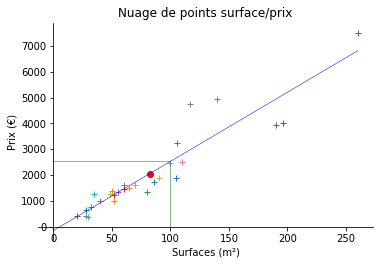

In [ ]:
graphique(surfaces, prix)
plt.plot(X_bar,Y_bar,'r' , marker = 'o')
trace_droite(a,b,max(surfaces))
plt.plot([100,100],[0,y_ajuste], linewidth = 0.5, color = 'green')
plt.plot([0,100],[y_ajuste,y_ajuste], linewidth = 0.5, color = 'green')

**_Quelle surface envisager avec un loyer de 1000 € ?_**

Il faut cette fois faire la régression dans l'autre sens...

AVec 1000 €, la surface envisageable est de  48.17498842411121 m²


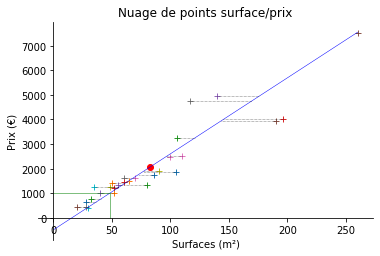

In [ ]:
a_prim = covariance(prix,prix)/covariance(surfaces,prix)

b_prim = Y_bar - a_prim*X_bar

graphique(surfaces, prix)
plt.plot(X_bar,Y_bar,'r' , marker = 'o')
trace_droite(a_prim,b_prim,max(surfaces))

for k in range(L):
    plt.plot([surfaces[k],(prix[k]-b_prim)/a_prim], [prix[k], prix[k]], color = 'black', linestyle = ':', linewidth = 0.5)

x_ajuste = (1000 - b_prim)/a_prim

plt.plot([x_ajuste,x_ajuste],[0,1000], linewidth = 0.5, color = 'green')
plt.plot([0,x_ajuste],[1000,1000], linewidth = 0.5, color = 'green')

print('AVec 1000 €, la surface envisageable est de ',x_ajuste,'m²')